# Project: compressive strength of concrete
By: 

In [2]:
#importing modules and packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [51]:
#Loading in the data
data = pd.read_csv('Concrete_DatA.csv',sep=';')

#adjusting the names of the columns in the datatset
data.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'Cement', 
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast furnace slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'Water', 
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse aggregate', 
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine aggregate', 
    'Age (day)':'Age', 
    'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'
}, inplace=True)

#looking at it
data.head()

,Cement,Blast furnace slag,Fly ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [54]:
#Obtaining statistics on the dataset (maybe not needed)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast furnace slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


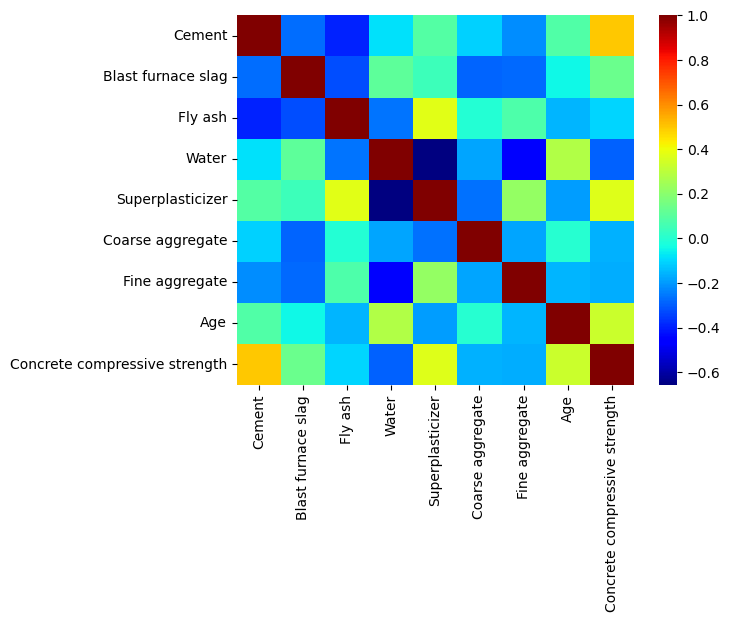

In [53]:
#Plotting a heatmap to show the correlation between the features
plt.figure
sns.heatmap(data.corr(),cmap = 'jet')
#plt.tight_layout()
plt.show()

## Scaling and PCA
### Scaling the data

In [56]:
scaled_data = StandardScaler().fit_transform(data)

#checking that the means are standardised
print(f" Means: {scaled_data.mean(axis=0)}")

#checking that the standard deviations are standardised
print(f"\n Std: {scaled_data.std(axis=0)}")

 Means: [-4.55299229e-16 -1.24172517e-16 -5.51877853e-17 -1.65563356e-16
 -8.27816780e-17  6.76050370e-16 -4.75994648e-16  2.06954195e-17
 -2.75938927e-17]

 Std: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


### PCA

In [83]:
pca_data = PCA().fit(scaled_data)
scores = pca_data.transform(scaled_data)

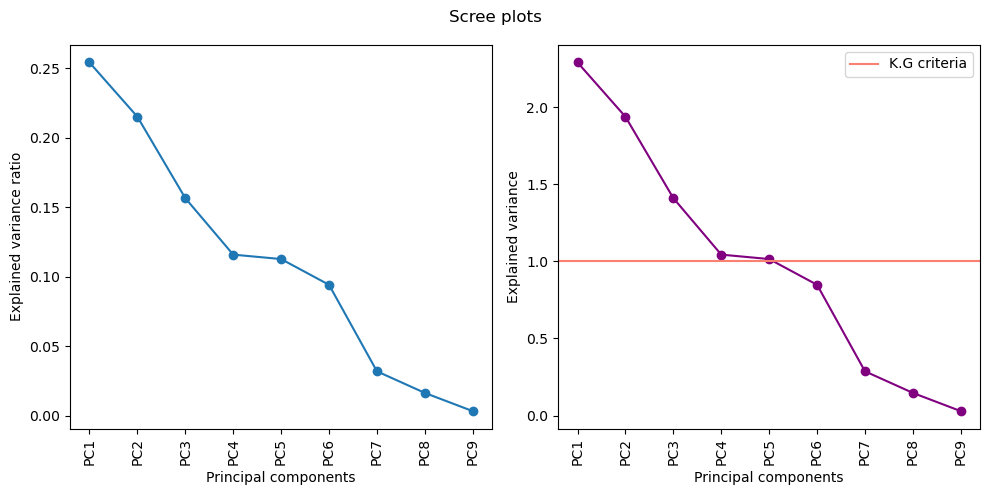

In [88]:
#Making a screeplot to help determine how many principal components to keep

fig,ax = plt.subplots(ncols = 2,figsize=(10,5))

fig.suptitle('Scree plots')


ax[0].plot(pca_data.explained_variance_ratio_,'o-')
ax[0].set_xlabel('Principal components')
ax[0].set_ylabel('Explained variance ratio')
ax[0].set_xticks(range(len(pca_data.components_)))
ax[0].set_xticklabels([f"PC{i+1}" for i in range(len(pca_data.explained_variance_ratio_))],rotation = 90)



ax[1].plot(pca_data.explained_variance_,'o-',color='purple')
ax[1].set_xlabel('Principal components')
ax[1].set_ylabel('Explained variance')
ax[1].set_xticks(range(len(pca_data.components_)))
ax[1].set_xticklabels([f"PC{i+1}" for i in range(len(pca_data.explained_variance_))],rotation = 90)

#adding a line for the kaiser-guttman criteria
ax[1].axhline(y=1,color='salmon',label = 'K.G criteria')
ax[1].legend()

plt.tight_layout()
plt.show()


Using the Kaiser-Guttman criterion, 5 principal components are kept

In [100]:
print(f"The first five PCs explain {np.round(np.sum(pca_data.explained_variance_ratio_[:5])*100)} % of the variance")

The first five PCs explain 85.0 % of the variance


Loading plot to show the connections between the features. Plotted for PC1 and PC2

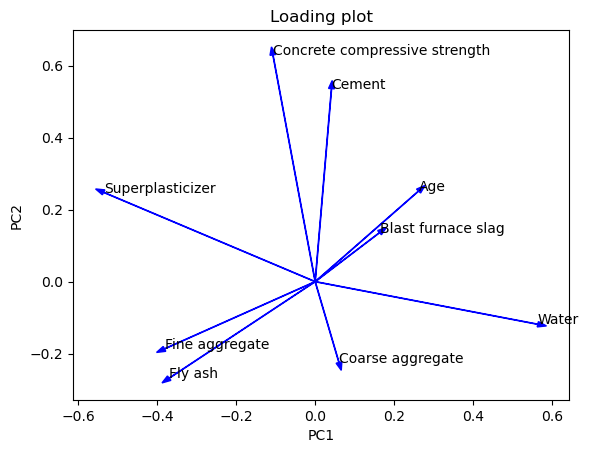

In [101]:
fig,ax = plt.subplots()

for i, name in zip(range(len(pca_data.components_)),data.columns):
    ax.arrow(x=0,y=0,dx=pca_data.components_[0,i],dy=pca_data.components_[1,i],head_width=0.015,color='blue')
    ax.text(x=pca_data.components_[0,i],y=pca_data.components_[1,i],s=name)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Loading plot')
plt.show()

### Creating a scoreplot

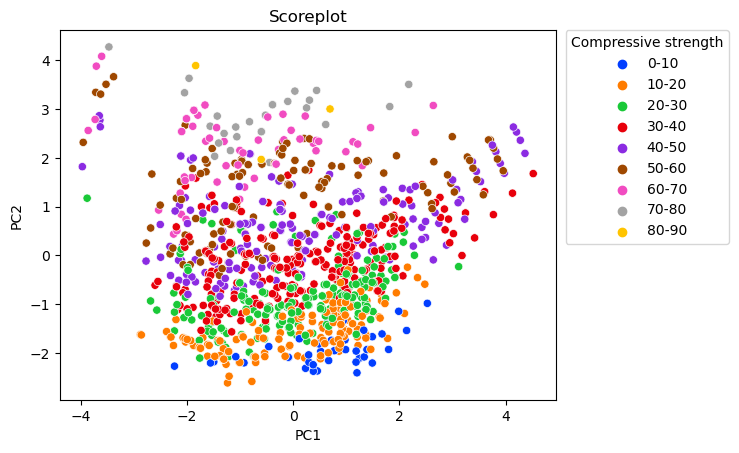

In [146]:
#Dividing up the values from 'Concrete compressive strength' into bins with intervals of 10
bins = range(0, 91, 10)  #Setting the range
labels = [f'{i}-{i+10}' for i in bins[:-1]]  # Creating labels for the bins
data['Strength Category'] = pd.cut(data['Concrete compressive strength'], bins=bins, labels=labels, right=False)

#Scoreplot to see the data vs the principal components
sns.scatterplot(x=scores[:, 0], y=scores[:, 1], hue=data['Strength Category'], palette='bright')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scoreplot')
#plt.legend(title='Compressive Strength')
plt.legend(title='Compressive strength', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) #moves legend to the side of the "plot area"

plt.show()


